# **Lab 0 - Explainable and Trustworthy AI**


---



**Teaching Assistant**: *Salvatore Greco*

## **Lab 0:** Machine Learning pipeline with Pandas and Scikit-learn

In this lab, you will learn about **pre-processing** and **model training** in Machine Learning (ML) with [Pandas](https://pandas.pydata.org/) and [Scikit-Learn](https://scikit-learn.org/stable/) libraries.


[Pandas](https://pandas.pydata.org/) is a Python library useful for handling and analyzing data structures, particularly bidimensional tables and time series (i.e., data associated with time). It provides useful data structures (e.g., Series and DataFrames) to manage data effectively. The library provides tools for managing the data selection, transforming data with grouping and pivoting operations, managing missing data in the dataset, and performing statistics and charts on data. Pandas is based on [Numpy](https://numpy.org/) arrays.

[Scikit-Learn](https://scikit-learn.org/stable/) is a Python library that implements many machine learning algorithms, and it is built on [Numpy](https://numpy.org/), [SciPy](https://scipy.org/) and [Matplotlib](https://matplotlib.org/). In Scikit-learn both *unsupervised* (e.g., K-Means, DBScan clustering algorithms), and *supervised* algorithms for *regression* and *classification* tasks are available. Scikit-Learn also provides  useful functions for data pre-processing, feature extraction, feature selection, and dimensionality reduction.

A typical **machine learning pipeline** involves the following steps:
  1. **Data Collection**: Gather your data. - *(uncovered)*
  2. **Data Exploration**: Perform exploratory data analysis to understand patterns, distributions, and correlations in the data. - *(uncovered)*
  3. **Data Splitting**: Split the dataset into training, validation (optional), and test sets.
  4. **Data Cleaning**: Handle missing values, remove duplicates, and correct errors.
  5. **Feature Selection**: Select relevant features and remove redundant ones.
  6. **Data Transformation**: Normalization, standardization, and encoding.
  7. **Feature Engineering**: Create new features or modify existing ones (e.g., discretization).
  8. **Data Augmentation**: Augment the training set to increase its size and variability (if possible). Apply techniques like oversampling, undersampling, or [SMOTE](https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c) to handle imbalanced data. - *(uncovered)*
  9. **Model Selection and Training**: Choose and train the model using the pre-processed training set.
  10. **Hyperparameters Tuning**: Explore various hyperparameter configurations to improve upon the baseline model's performance.  Evaluate each set of hyperparameters using a validation set or cross-validation to assess the model's performance. - *(uncovered)*
  11. **Model Evaluation**: Evaluate the model's performance on the preprocessed test set using appropriate metrics.

You can also create pre-processing pipelines that automate all the pre-processing steps.

The previous steps are just a general list. However, they depend on the model you want to train. For example, tree-based algorithms such as decision trees and random forests can handle categorical data naturally. This, they do not require the encoding of categorical features and normalization/standardization.

 Note that, it is reccomended to split the dataset early in the process and using *only* the training set for deriving any data-specific insights or transformations are fundamental practices to prevent data leakage and ensure the model's generalizability to new data. This approach maintains the test set as an unbiased assessment of the model's performance.

---

## **Exercise 1: Titanic Survival Prediction**

In this exercise, you will train a binary classification model that predicts which **passengers survived** the **Titanic shipwreck** <a href="https://www.kaggle.com/c/titanic" >link</a>.

The sinking of the Titanic is one of the most famous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While some element of luck was involved in surviving, it seems some groups of people were more likely to survive than others.

In this exercise, you are asked to build a predictive model that answers the question: *“What sorts of people were more likely to survive?”* using passenger data (i.e., name, age, gender, socio-economic class, etc).

You can find two detailed **tutorials** in the following links: [tutorial1](https://datasciencewithchris.com/kaggle-titanic-data-cleaning-and-preprocessing/) and [tutorial2](https://medium.com/@melodyyip_/titanic-survival-prediction-using-machine-learning-89a779656113).

Run the next cell to import the required libraries for this exercise.

In [1]:
# Import the required libraries for this exercise

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import tree

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### 1.1 Load dataset

Firstly, you will load the **Titanic** dataset used in this lab into a DataFrame `df`.

**Scikit-Learn** comes with a built-in dataset for the **Titanic survival prediction** task. The next cell loads the titanic dataset from Scikit-Learn and stores it in a Pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [2]:
# Load input features and target variable
df, y = fetch_openml('titanic', version=1, as_frame=True, parser='auto', return_X_y=True)

# The "survived" column contains the target variable
df["survived"] = y

# Print the number of samples in the dataset
print(f"Number of samples in the dataset: {len(df)}")

Number of samples in the dataset: 1309


Pandas [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) have useful methods and attributes  to manipulate and analyze data efficiently.

Some methods and attributes are useful for getting a quick overview of your data. Some examples include:
- `df.head()`: This method returns the first *n* rows of the DataFrame, where *n* is a parameter that you can specify. If you do not specify n, it defaults to 5. This is particularly useful for quickly inspecting the beginning of your dataset to understand its structure and the type of data it contains.
- `df.info()`: This method provides a concise summary of the DataFrame, including the number of non-null entries in each column, the data type of each column, the memory usage, the number of columns, and the range index. It can be useful for getting a quick overview of the DataFrame's structure and to identify columns with missing values.
- `df.columns()`: This attribute can be used to view or modify the column names. For example, you can use df.columns.tolist() to get a list of all column names.
- `df.describe()`: This method generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding *NaN* values. It works on numeric and object data types, providing information such as mean, standard deviation, minimum, maximum, and quartile values for numeric data, and count, unique, top, and frequency for object data (e.g., strings or timestamps).



In [3]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [4]:
print(f"Dataset columns: {df.columns.tolist()}")

Dataset columns: ['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [6]:
df.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


The `"survived"` column contains the target variable (i.e., the variable that you want to predict).

Some datasets contain a **balanced** number of samples for each label. Thus, each category of data is equally represented. However, many real-world datasets are **imbalanced**, meaning they have a disproportionate number of samples in one or more classes than others.

Highly **imbalanced** datasets can cause the model to become biased towards the more frequently represented class(es), thereby reducing the model's ability to generalize well across all categories. In such cases, the model trained may perform well on the majority class(es) but poorly on the minority class(es), because it has not had enough data to learn from for the underrepresented categories. Imbalance can significantly affect the performance and fairness of predictive models, leading to misleadingly high accuracy scores that do not accurately reflect the model's ability to predict less frequent classes.

Run the next cell to count the number of samples for each class label. This is useful to verify if the dataset is **balanced** or **imbalanced**.

In [7]:
df["survived"].value_counts()

0    809
1    500
Name: survived, dtype: int64

In this case, the dataset is slightly **imbalanced**. The *non-survived* class (0) is more frequent than the *survived* class (1).

The next cell counts the number of duplicate rows.

In [8]:
# check for duplicate rows
duplicate_rows = df.duplicated(keep=False).sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


There are no duplicate rows in this dataset. However, in Pandas, you can remove duplicate rows using `df.drop_duplicates()`. You can also remove duplicates based on a specified column `df.drop_duplicates(subset='column_name')`.

### 1.2 Train and Test splitting with Stratification

The first step involves splitting your dataset into distinct subsets to ensure that your model can generalize well to unseen data. This step is crucial for evaluating the performance of your model in an unbiased manner.

Datasets are usually split into the following subset:
- **Training Set**: Subset of your data used to train your model. It is the largest portion from which your model learns the underlying patterns to perform accurate predictions.

- **Validation Set**: (Optional but highly recommended) Subset used to fine-tune the model's hyperparameters and evaluate which models, configurations, or hyperparameters is the best performance. It acts as a proxy for the test set during the development phase.

- **Test Set**: Subset used to evaluate the final model's performance after it has been trained and validated. It provides an assessment of how well your model has learned to generalize from the training data to new, unseen data.

In this lab, we will only use training and test set for semplicity, and due to the low number of samples in the dataset.


**Exercise:** Split the dataset into **train** and **test** datasets. In this case, the dataset is **imbalanced**. Therefore, it is recommended to split using stratification (i.e., the class label distribution will be preserved during the splitting).

**Split** with 80% of samples for training and 20% of samples for validation. **Shuffle** the dataset before splitting, and perform the **stratification** by label. Replace `None` with your code.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li> To split a dataset you can use the `train_test_split` function of Scikit-learn (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" >link</a>).
</ul>
</p>

In [9]:
#### START CODE HERE (~ 1 line) ####

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42, stratify=df['survived'])

#### END CODE HERE ####

In [10]:
print(f"Number of samples in the training set {len(df_train)}")
print(df_train["survived"].value_counts())

Number of samples in the training set 1047
0    647
1    400
Name: survived, dtype: int64


In [11]:
print(f"Number of samples in the test set {len(df_test)}")
print(df_test["survived"].value_counts())

Number of samples in the test set 262
0    162
1    100
Name: survived, dtype: int64


### 1.3 Handling missing values

Machine learning algorithms require that all the input values are in a **numerical** formal. However, real-world datasets are often "dirty". For instance, they can contain missing values for some columns and records. Before training your ML models, you should handle missing values.

You should first check if **null** values are present in your dataset. Pandas Dataframes have many useful methods to check for null values in your dataset.
- `df.isnull()` or `df.isna()`: They return a DataFrame with the same shape as the input DataFrame, but containing boolean values (True or False) indicating the presence of null values.
- `df.notnull()` or `df.notna()`: The opposite of isnull() and isna().


**Exercise**: Count the number of **null values** in training and test, and store them in the variables `nan_count_train` and `nan_count_test`.
Replace `None` with your code.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>

<ul>
    <li> Remember that boolean values can also be interpreted as 0 (False) and 1 (True). Thus, you can exploit the `df.sum()` method to count the number of ones.
</ul>
</p>

In [12]:
#### START CODE HERE (~ 2 line) ####

nan_count_train = df_train.isna().sum()
nan_count_test = df_test.isna().sum()

#### END CODE HERE ####

In [13]:
print("Train")
print(nan_count_train)

Train
pclass         0
name           0
sex            0
age          209
sibsp          0
parch          0
ticket         0
fare           1
cabin        822
embarked       0
boat         658
body         955
home.dest    450
survived       0
dtype: int64


In [14]:
print("Test")
print(nan_count_test)

Test
pclass         0
name           0
sex            0
age           54
sibsp          0
parch          0
ticket         0
fare           0
cabin        192
embarked       2
boat         165
body         233
home.dest    114
survived       0
dtype: int64


In several columns of the dataset, missing values are present, specified with `NaN` (i.e., not a number).

There are several strategies for handling missing data, some examples include:
1. **Deletion**: Discard entire rows/columns containing missing
values.
2.  **Imputation**: Replace missing values with some imputed values (e.g., mean, median, constant, etc.).

3.  **Inference**: Use other data points to train a model that can predict the missing values.

> #### 1. Discarding missing values
  * You can **remove** rows or columns containing missing values using the `df.dropna(axis=)` method of Pandas DataFrames. If you specify `axis=0`, it will remove *rows* containing missing values. In contrast, if you specify `axis=1`, it will remove the *columns* containing missing values.
  * You can also remove rows containing missing values in a specific column specifying the `subset` parameter (e.g., `df.dropna(subset = ["column_name"])`). In this case,  all rows containing a missing value in the `column_name` column are removed.
  * Note that, `df.dropna()` returns a new DataFrame. Therefore, you should re-assign to `df` the new DataFrame (e.g., `df = df.dropna()`) or set the `inplace` parameter to `True` (e.g., `df.dropna(inplace=True)`).

> #### 2. Imputing missing values
  * You can impute values on missing data with Pandas with the `df.fillna()` method and specify the new value that will replace the `NaN` values. The `df.fillna()` method returns a new DataFrame by replacing the null values with the specified value. For instance, you can replace `NaN` values with the column mean with `df.fillna(df.mean())`.
  * You can also use Scikit-Learn to impute values on missing data with `sklearn.impute.SimpleImputer`. The [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) can replace missing values using a descriptive statistic (e.g., mean, median, or most frequent) along each column, or using a constant value.
    - `"mean"`: replace missing values using the *mean* along each column (only for numeric data).
    - `"median"`: replace missing values using the *median* along each column (only for numeric data).
    - `"most_frequent"`: replace missing using the *most frequent value* along each column (for both strings and numeric data).
  * Below is reported an example of usage:

```python
from sklearn.impute import SimpleImputer

# Instantiate a SimpleImputer object specifying the descriptive statistic
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean’)

# Compute the mean fitting on training data (important! do not fit on test data)
imp_mean.fit(X_train.values)  

# Replace missing values in the training set
X_train = imp_mean.transform(X_train.values)
# replace missing values in the test set
X_test = imp_mean.transform(X_ test.values)

```

> #### 3. Predicting missing values
Using models to predict the missing values is uncovered in this lab. However, the idea is to simply train a machine learning model (e.g., linear regression) to predict missing values. If you are interested, you can read more about it [here](https://medium.com/machine-learning-mastery/5-ways-to-handle-missing-values-in-python-4fe6a625e251).

**Exercise**: Fill **null values** in the column `age` with the **mean** of the column `age` in the training and test set.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>

<ul>
    <li> Remember that all the statistics must be computed on the training set only. Therefore, the null values in the test set must be replaced by the mean of the training.
</ul>
</p>

In [15]:
print(f'Number of null values in Train before pre-processing: {df_train.age.isnull().sum()}/{len(df_train)}')
print(f'Number of null values in Test before pre-processing: {df_test.age.isnull().sum()}/{len(df_test)}')

#### START CODE HERE (~ 2 line) ####

df_train['age'].fillna(df_train['age'].mean(), inplace=True)
df_test['age'].fillna(df_train['age'].mean(), inplace=True)

#### END CODE HERE ####

print(f'Number of null values in Train after pre-processing: {df_train.age.isnull().sum()}/{len(df_train)}')
print(f'Number of null values in Test after pre-processing: {df_test.age.isnull().sum()}/{len(df_test)}')

Number of null values in Train before pre-processing: 209/1047
Number of null values in Test before pre-processing: 54/262
Number of null values in Train after pre-processing: 0/1047
Number of null values in Test after pre-processing: 0/262


**Exercise**: Fill **null values** in the column `fare` with the **median** of the column `fare` in the training and test set.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>

<ul>
    <li> Remember that all the statistics must be computed on the training set only. Therefore, the null values in the test set must be replaced by the median of the training.
</ul>
</p>

In [16]:
print(f'Number of null values in Train before pre-processing: {df_train.fare.isnull().sum()}/{len(df_train)}')
print(f'Number of null values in Test before pre-processing: {df_test.fare.isnull().sum()}/{len(df_test)}')

#### START CODE HERE (~ 2 line) ####

df_train['fare'].fillna(df_train['fare'].median(), inplace=True)
df_test['fare'].fillna(df_train['fare'].median(), inplace=True)

#### END CODE HERE ####

print(f'Number of null values in Train after pre-processing: {df_train.fare.isnull().sum()}/{len(df_train)}')
print(f'Number of null values in Test after pre-processing: {df_test.fare.isnull().sum()}/{len(df_test)}')

Number of null values in Train before pre-processing: 1/1047
Number of null values in Test before pre-processing: 0/262
Number of null values in Train after pre-processing: 0/1047
Number of null values in Test after pre-processing: 0/262


**Exercise**: Fill **null values** in the column `embarked` with the **most frequent value** of the column `embarked` in the training and test set.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>

<ul>
    <li> Remember that all the statistics must be computed on the training set only. Therefore, the null values in the test set must be replaced by the most frequent value of the training.
</ul>
</p>

In [17]:
print(f'Number of null values in Train before pre-processing: {df_train.embarked.isnull().sum()}/{len(df_train)}')
print(f'Number of null values in Test before pre-processing: {df_test.embarked.isnull().sum()}/{len(df_test)}')

#### START CODE HERE (~ 3 line) ####

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_train['embarked'] = imp.fit_transform(df_train[['embarked']])

df_test['embarked'] = imp.transform(df_test[['embarked']])

#### END CODE HERE ####

print(f'Number of null values in Train after pre-processing: {df_train.embarked.isnull().sum()}/{len(df_train)}')
print(f'Number of null values in Test after pre-processing: {df_test.embarked.isnull().sum()}/{len(df_test)}')

Number of null values in Train before pre-processing: 0/1047
Number of null values in Test before pre-processing: 2/262
Number of null values in Train after pre-processing: 0/1047
Number of null values in Test after pre-processing: 0/262


### 1.4 Feature selection
Feature selection is a critical step in the machine learning pipeline, as it involves choosing the most relevant features (or variables) that contribute to the predictive power of a model. The goal of feature selection is not only to improve the model's performance but also to reduce the computational complexity and enhance the interpretability of the model. The following are the main advantanges produced by an effective feature selection:
- **Improves Model Performance**: By removing irrelevant or redundant features, it can increase the accuracy of the model and reduce the risk of overfitting.
- **Reduces Training Time**: It can reduce training time by reducing the complexity of the inputs, which is particularly beneficial when dealing with large datasets.
- **Increases Model Interpretability**: Models with fewer features are easier to understand and explain, making the results more accessible to non-experts.

Identifiers, unique codes, etc., are usually useless features that must be removed.

You can learn more about advanced feature selection techniques [here](https://nathanrosidi.medium.com/feature-selection-techniques-in-machine-learning-82c2123bd548).

In this exercise, you will just remove features based on the domain knowledge. Specifically, you will remove features that are useless or contain explicit information related to target variable (i.e., the model by using that feature has the information of the actual label). However, data visualization and exploratory data analysis can help in identifying relationships between features and the target variable, as well as spotting redundant features. In this lab, you will also optionally exploit a correlation matrix to remove redundant features.


**Exercise**: Remove columns `cabin`, `body`, `boat`, and `home.dest` from the train and test sets because they contain info about the target variable (i.e., the model could "cheat" predicting the target label based on the info in these attributes).


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>

<ul>
    <li> You can find useful the 'df.drop()' method.
</ul>
</p>

In [18]:
#### START CODE HERE (~ 2 line) ####

df_train = df_train.drop(columns=['cabin', 'body', 'boat', 'home.dest'])

df_test = df_test.drop(columns=['cabin', 'body', 'boat', 'home.dest'])

#### END CODE HERE ####

df_train.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
999,3,"McCarthy, Miss. Catherine 'Katie'",female,29.604316,0,0,383123,7.7500,Q,1
392,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.000000,1,0,SC/PARIS 2167,27.7208,C,1
628,3,"Andersson, Miss. Sigrid Elisabeth",female,11.000000,4,2,347082,31.2750,S,0
1165,3,"Saad, Mr. Khalil",male,25.000000,0,0,2672,7.2250,C,0
604,3,"Abelseth, Miss. Karen Marie",female,16.000000,0,0,348125,7.6500,S,1



**Exercise**: Remove other columns that you think are useless features in predicting which people were more likely to survive.

In [19]:
#### START CODE HERE (~ 2 line) ####

df_train = df_train.drop(columns=['name','ticket'])
df_test = df_test.drop(columns=['name','ticket'])

#### END CODE HERE ####

df_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
999,3,female,29.604316,0,0,7.7500,Q,1
392,2,female,24.000000,1,0,27.7208,C,1
628,3,female,11.000000,4,2,31.2750,S,0
1165,3,male,25.000000,0,0,7.2250,C,0
604,3,female,16.000000,0,0,7.6500,S,1


The next cell plots a **correlation** matrix of the input features with respect to the target variable. The **correlation matrix** is a powerful tool in the data pre-processing phase, especially when you're trying to understand the relationships between your input features and the target variable. Specifically, the **correlation matrix** can be used to:
- **Identify Relationships**: It helps in identifying the linear relationship between the input features and the target variable. A high positive or negative correlation indicates a strong relationship, whereas a correlation close to zero suggests no linear relationship.
- **Feature Selection**: By analyzing the correlation matrix, you can identify and eliminate features that are highly correlated with each other but not with the target variable. This is because highly correlated features contribute redundant information, which can lead to overfitting.
- **Insights for Feature Engineering**: Understanding the relationships between features can also provide insights for feature engineering, such as creating new features that are combinations of existing ones.

<ipython-input-20-7bbd88f3e184>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(df_corr.corr(),


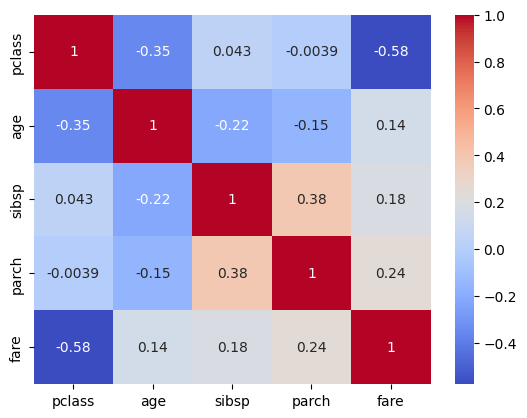

In [20]:
df_corr= pd.concat([df_train[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']], df_train['survived']], axis = 1)

g = sns.heatmap(df_corr.corr(),
                annot=True,
                cmap = "coolwarm")

**Exercise (optional)**: Remove or combine highly correlated features based on the correlation matrix.

In [21]:
#### START CODE HERE (~ 1 line) ####

#### END CODE HERE ####

df_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
999,3,female,29.604316,0,0,7.7500,Q,1
392,2,female,24.000000,1,0,27.7208,C,1
628,3,female,11.000000,4,2,31.2750,S,0
1165,3,male,25.000000,0,0,7.2250,C,0
604,3,female,16.000000,0,0,7.6500,S,1


### 1.5 Feature engineering

Another crucial pre-processing step in the machine learning pipeline is **feature engineering**, which involves creating new features or modifying existing ones to improve the performance of a machine learning model. Spefically, it can be useful to:
- **Improve model accuracy**: Effective modified features can capture essential information, making it easier for models to learn.
- **Improve model's generalizability**: By capturing the underlying patterns in the data more effectively, feature engineering can help models perform better on unseen data.
- **Reduce the need for complex models**: Simpler models with the right features can outperform complex models with a raw set of features.

#### Discretization
Discretization is a pre-processing step of machine learning that involves transforming continuous features into discrete or categorical ones. This process can be particularly useful for certain models that work better with categorical data, or when looking to simplify the patterns in the data, making them more interpretable for analysis. Discretization can also be beneficial for handling outliers and can improve the performance of some models by creating bins or categories that group continuous data points. The main advantages of using discretization can be summarized in the following:
- **Improves model interpretability**: By categorizing continuous features, discretization can potentially make the model's decisions easier to understand.
- **Handles outliers**: Outliers can have less impact when the data is divided into bins, as they will fall into the upper or lower bins along with other extreme values.
- **Reduces Complexity**: Discretization can act as a form of dimensionality reduction, simplifying the model by reducing the number of unique input values.

You can learn more about **discretization** <a href="https://trainindata.medium.com/variable-discretization-in-machine-learning-7b09009915c2" >here</a>.

**Exercise**: Discretize the `age` column in the training and test sets into the following categories: `['Child (0-14]', 'Young (14-24]', 'Adults (24-50]', 'Senior (50+]']`. The new discretized age column must by named `age_disc`. The discretized age categories are provided in the `age_category` list. Once performed the discretization, remove the old `age` column from the trining and test set.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>

<ul>
    <li> To segment data into bins you can use the `pd.cut` function. Specify the correct bins values and the labels. You should cut on the `age` column. </li>
    <li>To remove a column you can use `df.drop()`</li>
</ul>
</p>

In [22]:
age_category = ['Child (0-14]', 'Young (14-24]', 'Adults (24-50]', 'Senior (50+]']

#### START CODE HERE (~ 4 line) ####

df_train['age_disc']=pd.cut(x=df_train['age'], bins=[0,14,24,50,100],labels=age_category)
df_train = df_train.drop(columns=['age']) # Remove the old age column

df_test['age_disc']=pd.cut(x=df_test['age'], bins=[0,14,24,50,100],labels=age_category)
df_test = df_test.drop(columns=['age']) # Remove the old age column

#### END CODE HERE ####

In [23]:
df_train.head()

,pclass,sex,sibsp,parch,fare,embarked,survived,age_disc
999,3,female,0,0,7.7500,Q,1,Adults (24-50]
392,2,female,1,0,27.7208,C,1,Young (14-24]
628,3,female,4,2,31.2750,S,0,Child (0-14]
1165,3,male,0,0,7.2250,C,0,Adults (24-50]
604,3,female,0,0,7.6500,S,1,Young (14-24]


### 1.8 Feature encoding

Machine learning algorithms operate on numerical data, making it essential to convert any categorical input features into a numerical format before training your model. This process, known as **feature encoding**. Proper encoding of input features ensures that the algorithm can interpret the data correctly, leading to more accurate models. Note that this step depends on your algorithm. For instance, Decision trees and their ensembles (e.g., Random Forests) can handle categorical data naturally (depending on the implementation), but many models (such as linear regression, logistic regression, and neural networks) require numerical input.

Common encoding techniques include:
- **One-Hot Encoding**: For each unique category value, a new binary column is created. A category value is represented by a 1 in its corresponding column and 0s in all others. This method avoids implying an ordinal relationship but increases the feature space. For instance, a variable color containing three possible values, e.g., `red`, `green`, and `blue`, will create three additional columns: `color_red`, `color_green`, and `color_blue`. To represent the color green, you will represent the input with the following vector `[0, 1, 0]`. The main drawback of one-hot encoding is that it can significantly increase the dataset's sparsity (i.e., the number of zeros). Another possible drawback is that, if data has a natural order to the categories (e.g., low, medium, high) one-hot encoding can lose this information (use ordinal encoding in this case).
- **Label Encoding**: Each unique category value is assigned an integer value. This method is straightforward but implies an ordinal relationship between categories, which may not always be appropriate.
- **Ordinal Encoding**: Similar to label encoding, but the integer assignments are made based on the order specified by the user, making it suitable for ordinal data.

You can learn more about all the encoding techniques [here](https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b).

#### One-hot encoding

Scikit-Learn make you easy to perform the one-hot encoding with the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

You can also use a similar approach using Pandas which provide a DataFrame's method `df.get_dummies()` to perform the one-hot encoding ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)).

The two approach are similar. The main difference is that the `get_dummies` method does not store the information about train data categories. Hence it may result in inconsistencies with train and test data features. You can learn the differences between `OneHotEncoder` and `get_dummies` [here](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/).

The next cell performs the one-hot encoding on the **training set** for the `sex` and `embarked` columns using the `OneHotEncoder`. Then, it removes the old columns. The new encoded training set is stored in a new DataFrame `df_train_encoded`.

In [24]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

categorical_columns = ['sex', 'embarked']

# Fit the one-hot encoder on training data
ohe.fit(df_train[categorical_columns])

# Create a new DataFrame with only the one-hot encoded columns
temp_df_train = pd.DataFrame(data=ohe.transform(df_train[categorical_columns]).toarray(),
                             columns=ohe.get_feature_names_out())

# Create a copy of the DataFrame
df_train_encoded = df_train.copy()

# Remove the old categorical columns from the original data
df_train_encoded.drop(columns=categorical_columns, axis=1, inplace=True)
df_train_encoded = pd.concat([df_train_encoded.reset_index(drop=True), temp_df_train], axis=1)

Now, look the differences between the original raw trainig and the encoded training DataFrames.

In [25]:
df_train.head()

,pclass,sex,sibsp,parch,fare,embarked,survived,age_disc
999,3,female,0,0,7.7500,Q,1,Adults (24-50]
392,2,female,1,0,27.7208,C,1,Young (14-24]
628,3,female,4,2,31.2750,S,0,Child (0-14]
1165,3,male,0,0,7.2250,C,0,Adults (24-50]
604,3,female,0,0,7.6500,S,1,Young (14-24]


In [26]:
df_train_encoded.head()

,pclass,sibsp,parch,fare,survived,age_disc,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,0,0,7.7500,1,Adults (24-50],1.0,0.0,0.0,1.0,0.0
1,2,1,0,27.7208,1,Young (14-24],1.0,0.0,1.0,0.0,0.0
2,3,4,2,31.2750,0,Child (0-14],1.0,0.0,0.0,0.0,1.0
3,3,0,0,7.2250,0,Adults (24-50],0.0,1.0,1.0,0.0,0.0
4,3,0,0,7.6500,1,Young (14-24],1.0,0.0,0.0,0.0,1.0


You can see that a new column is created for each distinct category of the encoded columns `sex` and `embarked`.

**Exercise**: Perform the same one-hot encoding on the test set. Create a new DataFrame `df_test_encoded`.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>

<ul>
    <li> Remember to do not fit another OneHotEncoder. Instead, use the one fitted on the training set.
</ul>
</p>

In [27]:
#### START CODE HERE (~ 4 lines) ####

temp_df_test = pd.DataFrame(data=ohe.transform(df_test[categorical_columns]).toarray(),
                       columns=ohe.get_feature_names_out()) # Do not fit on test data!

df_test_encoded = df_test.copy()

df_test_encoded.drop(columns=categorical_columns, axis=1, inplace=True)
df_test_encoded = pd.concat([df_test_encoded.reset_index(drop=True), temp_df_test], axis=1)

#### END CODE HERE ####

In [28]:
df_test.head()

,pclass,sex,sibsp,parch,fare,embarked,survived,age_disc
1028,3,female,1,0,24.1500,Q,1,Adults (24-50]
1121,3,male,1,1,22.3583,C,1,Adults (24-50]
1155,3,male,0,0,7.7750,S,0,Adults (24-50]
1251,3,male,0,0,8.0500,S,0,Adults (24-50]
721,3,male,0,0,7.4958,S,0,Adults (24-50]


In [29]:
df_test_encoded.head()

,pclass,sibsp,parch,fare,survived,age_disc,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,1,0,24.1500,1,Adults (24-50],1.0,0.0,0.0,1.0,0.0
1,3,1,1,22.3583,1,Adults (24-50],0.0,1.0,1.0,0.0,0.0
2,3,0,0,7.7750,0,Adults (24-50],0.0,1.0,0.0,0.0,1.0
3,3,0,0,8.0500,0,Adults (24-50],0.0,1.0,0.0,0.0,1.0
4,3,0,0,7.4958,0,Adults (24-50],0.0,1.0,0.0,0.0,1.0


#### Ordinal encoding

With Scikit-Learn you can perform the ordinal encoding with the [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

You previously discretized the `age` column into bins, creating a new column `age_disc`. This column must be encoded as well. However, in this case, the categories have an explicit order, Therefore, the ordinal encoding is more suitable.

The next cells perform the ordinal encoding of the `age_disc` column on the training set by fitting the OrdinalEncoder on the training data, transform the training dataset column, and delete the old columns.

In [30]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the OrdinalEncoder specifying the list of the categories
ord_enc = OrdinalEncoder(categories=[age_category]) # Should be a list becuause you can specify the categories for multiple columns


# Fit the OrdinalEncoder on training data
ord_enc.fit(df_train_encoded.loc[:, ["age_disc"]])

ord_enc

OrdinalEncoder(categories=[['Child (0-14]', 'Young (14-24]', 'Adults (24-50]',
                            'Senior (50+]']])

In [31]:
# Transform the training data column 'age_disc' into the encoded version 'age_disc_enc'
df_train_encoded["age_disc_enc"] = ord_enc.transform(df_train_encoded.loc[:, ["age_disc"]])

In [32]:
df_train_encoded.head()

,pclass,sibsp,parch,fare,survived,age_disc,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,3,0,0,7.7500,1,Adults (24-50],1.0,0.0,0.0,1.0,0.0,2.0
1,2,1,0,27.7208,1,Young (14-24],1.0,0.0,1.0,0.0,0.0,1.0
2,3,4,2,31.2750,0,Child (0-14],1.0,0.0,0.0,0.0,1.0,0.0
3,3,0,0,7.2250,0,Adults (24-50],0.0,1.0,1.0,0.0,0.0,2.0
4,3,0,0,7.6500,1,Young (14-24],1.0,0.0,0.0,0.0,1.0,1.0


You can see that the new column `age_disc_enc` is represented with an incremental number. Therefore, the order is preserved.

In [33]:
# Delete the old 'age_disc' column
df_train_encoded.drop(columns=["age_disc"], axis=1, inplace=True)

df_train_encoded.head()

,pclass,sibsp,parch,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,3,0,0,7.7500,1,1.0,0.0,0.0,1.0,0.0,2.0
1,2,1,0,27.7208,1,1.0,0.0,1.0,0.0,0.0,1.0
2,3,4,2,31.2750,0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,0,0,7.2250,0,0.0,1.0,1.0,0.0,0.0,2.0
4,3,0,0,7.6500,1,1.0,0.0,0.0,0.0,1.0,1.0


**Exercise**: Perform the same ordinal encoding on the test set, and remove the old `age_disc` column.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>

<ul>
    <li> Remember to do not fit another OrdinalEncoder. Instead, use the one fitted on the training set.
</ul>
</p>

In [34]:
#### START CODE HERE (~ 2 lines) ####

df_test_encoded["age_disc_enc"] = ord_enc.transform(df_test_encoded.loc[:, ["age_disc"]])
df_test_encoded.drop(columns=["age_disc"], axis=1, inplace=True)

#### END CODE HERE ####

df_test_encoded.head()

,pclass,sibsp,parch,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,3,1,0,24.1500,1,1.0,0.0,0.0,1.0,0.0,2.0
1,3,1,1,22.3583,1,0.0,1.0,1.0,0.0,0.0,2.0
2,3,0,0,7.7750,0,0.0,1.0,0.0,0.0,1.0,2.0
3,3,0,0,8.0500,0,0.0,1.0,0.0,0.0,1.0,2.0
4,3,0,0,7.4958,0,0.0,1.0,0.0,0.0,1.0,2.0


### 1.7 Normalization and Standardization


Some machine learning algorithms require input features to be **normalized** or **standardized** to work correctly, as this can significantly impact the performance of the model, especially in algorithms that rely on distance computation or gradient descent optimization.

**Normalization** and **standardization** are two fundamental pre-processing steps that help to bring the data onto a common scale, making it easier to process by an algorithm. While both methods scale the data, their methods and purposes differ. The choice between normalization and standardization depends on the specific requirements of the algorithm and the nature of the data.





A **normalization** technique is **Min-Max** normalization. It is a simple tehcnique that rescales the range of features into `[0, 1]`. This is particularly useful when the parameters have to be bounded within a fixed range. It's also useful in algorithms that compute distances between data points and need normalization to ensure that each feature contributes equally to the result.

The formula for **Min-Max normalization** is:

$$ x\_norm = \frac{(x - x_{min})}{(x_{max} - x_{min})} $$

Where:
- $x$ is the original value.
- $x_{min}$ and $x_max$ are the minimum and the maximum of the feature.
- $x_{norm}$ is the normilized value.

Scikit-Learn provides you an useful class to perform the **Min-Max** normalization, namely [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

<br><br>

A widely used **standardization** technique is the **Z-score** normalization. This method involves rescaling the features so they have the properties of a standard normal distribution with zero mean $\mu=0$ and standard deviation one $\sigma = 1$. Standardization is crucial in cases where the data follows a Gaussian distribution and when the algorithm assumes data to be centered around zero.

The formula for **Z-score normalization** is:
$$ x_{standardized} = \frac{(x - \mu)}{\sigma}$$

Where:
- $x$ is the original value.
- $\mu$ is the mean of the feature values.
- $\sigma$ is the standard deviation of the feature values.
- $ x_{standardized}$ is the standardized value.

Unlike Min-Max normalization, standardization does not bind values to a specific range, which makes it useful for features with outliers or many variances. Algorithms like Support Vector Machines, Linear Regression, and Logistic Regression benefit significantly from standardization because it enhances their convergence in optimization algorithms.

Scikit-Learn provides you an useful class to perform the **Z-score** normalization, namely [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

**Exercise**: Perform **Min-Max** normalization of the *numerical features* specified in the `numerical_features` variable for both training and test sets. Remember to **fit** on the training and not on the test. Note that `age_disc_enc` in this case is categorical but can be normalized too.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>

<ul>
    <li> Use the MinMaxScaler provided by Scikit-Learn.
    <li> You must create the MinMaxScaler object, fit on the training encoded DataFrame, and transform the training and test encoded DataFrames.
    <li> You must use indexing to correctly access only the numerical features of your DataFrames.
</ul>
</p>

In [35]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ["pclass", "sibsp", "parch", "fare", "age_disc_enc"]

#### START CODE HERE (~ 4 lines) ####

minmax_s = MinMaxScaler()

minmax_s.fit(df_train_encoded[numerical_features])

df_train_encoded[numerical_features] = minmax_s.transform(df_train_encoded[numerical_features])
df_test_encoded[numerical_features] = minmax_s.transform(df_test_encoded[numerical_features])

#### END CODE HERE ####

In [36]:
df_train_encoded.head()

,pclass,sibsp,parch,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,1.0,0.000,0.000000,0.015127,1,1.0,0.0,0.0,1.0,0.0,0.666667
1,0.5,0.125,0.000000,0.054107,1,1.0,0.0,1.0,0.0,0.0,0.333333
2,1.0,0.500,0.222222,0.061045,0,1.0,0.0,0.0,0.0,1.0,0.000000
3,1.0,0.000,0.000000,0.014102,0,0.0,1.0,1.0,0.0,0.0,0.666667
4,1.0,0.000,0.000000,0.014932,1,1.0,0.0,0.0,0.0,1.0,0.333333


You can see that the numerical features are now rescaled into `[0, 1]`.

In [37]:
df_test_encoded.head()

,pclass,sibsp,parch,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,1.0,0.125,0.000000,0.047138,1,1.0,0.0,0.0,1.0,0.0,0.666667
1,1.0,0.125,0.111111,0.043640,1,0.0,1.0,1.0,0.0,0.0,0.666667
2,1.0,0.000,0.000000,0.015176,0,0.0,1.0,0.0,0.0,1.0,0.666667
3,1.0,0.000,0.000000,0.015713,0,0.0,1.0,0.0,0.0,1.0,0.666667
4,1.0,0.000,0.000000,0.014631,0,0.0,1.0,0.0,0.0,1.0,0.666667


### 2.1 Models training and evaluation

Scikit-Learn offers a wide range of pre-implemented classification algorithms. You can explore the available Scikit-Learn classification algorithms [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

Training a Scikit-Learn model typically involves the following steps:

- **Instantiate the model**: Select the model and create the model object by settings its parameters.
- **Training the Model**: Fit your model to the training data using the `.fit()` method.
- **Evaluating the Model**: Assess the model's performance on the testing set using metrics such as accuracy, precision, recall, and the confusion matrix. Once the model is trained, you can use the `.predict()` method.
- **Parameter Tuning**: Optionally, use cross-validation and grid search to find the best model parameters.

You can learn more about Scikit-Learn evaluation metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html).

Scikit-Learn also provides useful functions for [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html).

The next cells train and evaluate a **LogisticRegression** model.

In [38]:
# Extract target variable and input features for the training data
y_train = df_train_encoded['survived']               # Target variable trainig set
X_train = df_train_encoded.drop('survived', axis=1)  # Features training set


# Extract target variable and input features for  the testing data
y_test = df_test_encoded['survived']                 # Target variable test set
X_test = df_test_encoded.drop('survived', axis=1)    # Features test set


In [39]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr_model = LogisticRegression(max_iter=1000)  # Increasing max_iter if convergence warning occurs

# Train the model
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Make predictions
y_test_pred_lr = lr_model.predict(X_test)

# Evaluate the model
lr_acc = accuracy_score(y_test, y_test_pred_lr)
lr_f1 = f1_score(y_test, y_test_pred_lr, average='macro')

# Print accuracy and F1 Score
print(f"Accuracy: {lr_acc:.2f}")
print(f"F1: {lr_f1:.2f}")

Accuracy: 0.83
F1: 0.81


Remember that, when the dataset is **imbalanced**, `F1 score` and `recall` are more useful metrics than `accuracy`.

Scikit-Learn provides you a useful function to compute several evaluation metrics, namely [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

labels = ["Not-Survived", "Survived"]

classification_report_lr = classification_report(y_test, y_test_pred_lr, target_names=labels)
print(classification_report_lr)

              precision    recall  f1-score   support

Not-Survived       0.84      0.90      0.87       162
    Survived       0.81      0.72      0.76       100

    accuracy                           0.83       262
   macro avg       0.82      0.81      0.81       262
weighted avg       0.83      0.83      0.83       262



The next cell plots the confusion matrix. The confusion matrix is a useful tool for evaluating the performance of classification models.
It provides a visual summary of how well the model predicts across different classes, allowing you to see not just the overall accuracy but also more specific details about where the model is making errors.

However, in this case the classification task is binary, so the confusion matrix is not very indicative. However, code is given to show how it can be fastly implemented using Scikit-Learn.

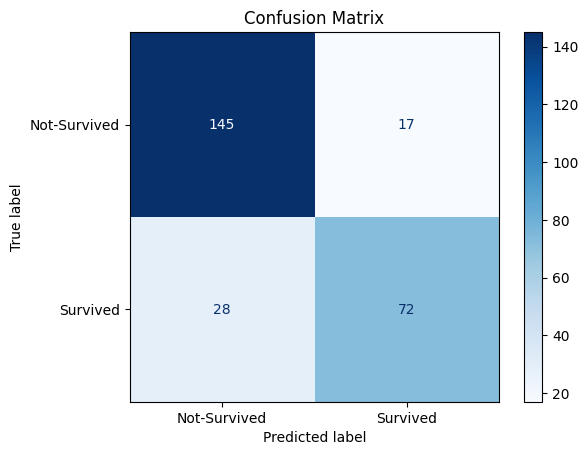

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_lr, cmap=plt.cm.Blues)
ax = cmd.ax_
ax.set_title('Confusion Matrix')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

**Exercise**: Train a [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and evaluate its performance. Compute the classification report and store it in a variable `classification_report_rf`.

In [43]:
from sklearn.ensemble import RandomForestClassifier

#### START CODE HERE (~ 4 lines) ####

rf_model = RandomForestClassifier(max_depth=5)

rf_model.fit(X_train, y_train)

y_test_pred_rf = rf_model.predict(X_test)

classification_report_rf = classification_report(y_test, y_test_pred_rf, target_names=labels)

#### END CODE HERE (~ 4 lines) ####

print(classification_report_rf)

              precision    recall  f1-score   support

Not-Survived       0.85      0.91      0.88       162
    Survived       0.83      0.75      0.79       100

    accuracy                           0.85       262
   macro avg       0.84      0.83      0.83       262
weighted avg       0.85      0.85      0.85       262



The next cells train and evaluate a SupportVectorMachine and a simple Neural Network models.

In [44]:
from sklearn.svm import SVC

svm_model = SVC(gamma=1.5, kernel="rbf", probability=True)

svm_model.fit(X_train, y_train)

y_test_pred_svm = svm_model.predict(X_test)

classification_report_svm = classification_report(y_test, y_test_pred_svm, target_names=labels)
print(classification_report_svm)

              precision    recall  f1-score   support

Not-Survived       0.82      0.98      0.89       162
    Survived       0.94      0.66      0.78       100

    accuracy                           0.85       262
   macro avg       0.88      0.82      0.83       262
weighted avg       0.87      0.85      0.85       262



In [45]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(256, 32), max_iter=500).fit(X_train, y_train)

y_test_pred_mlp = mlp_model.predict(X_test)

classification_report_mlp = classification_report(y_test, y_test_pred_mlp, target_names=labels)
print(classification_report_mlp)

              precision    recall  f1-score   support

Not-Survived       0.86      0.93      0.89       162
    Survived       0.86      0.76      0.81       100

    accuracy                           0.86       262
   macro avg       0.86      0.84      0.85       262
weighted avg       0.86      0.86      0.86       262



---

## **Exercise 2: Diabetes prediction**

In this exercise, you will train machine learning models to predict diabetes in patients based on their medical history and demographic information, using the **Diabetes prediction dataset**.

The **Diabetes prediction dataset** is a collection of medical and demographic data records from patients, and their diabetes status (positive or negative).


This is an example of real-world medical application. Indeed, this model can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans.


Each record includes several features, such as:
- **age**
- **gender**
- **body mass index** (BMI)
- **hypertension**
- **heart disease**
- **smoking history**
- **HbA1c level**
- **blood glucose level**  

In [46]:
# Import the required libraries for this exercise

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import tree

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# If your dataset is stored on Google Drive, mount the drive before reading it
# from google.colab import drive
# drive.mount('/content/drive')

Before running the next cell, upload the dataset on colab.

In [50]:
!unzip diabetes-dataset.zip

Archive:  diabetes-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [51]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [52]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [53]:
# Check if the dataset is balanced
df.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

**Exercise**: Now you will implement the **pre-processing pipeline**, and **train** and **evaluate** a **binary classifier** on the target variable.

The following steps are recommended to complete the task. However, it is up to you to make specific choices about the pre-processing to be performed.

Steps:

1. Perform the pre-processing:
  * Split into **train** and **test** sets (80% train and 20% test).
  * **Remove** useless or redundant features.
  * **Combine features** to create new features.
  * Handling **missing values**.
  * Perform **discretization** of features if necessary.
  * Encode **categorical features**.
  * Perform **normalization** or **standardization** of input features.
  * **Encode the target** variable if necessary.



2. Train one or more **binary classifiers** to predict the diabetes status of patiens. Use appropriate evaluation metrics to identify the best performing model.

***Hints*** :

>
* When performing the pre-processing steps, compute the statistics on training and transform the test data accordingly.
* All the categorical features must be properly encoded.
* The dataset is highly imbalanced. F1 score and recall are more appropriate metrics for this task.

---

This time the exercise is **open-ended**, so it is up to you to write all the code to carry out these steps.

In [54]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
df.info()

In [55]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Check for duplicate values

In [56]:
# check for duplicate rows
duplicates = df.duplicated(keep=False)
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 6939


In [57]:
df_duplicates = df.loc[duplicates]
df_duplicates

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
10,Female,53.0,0,0,never,27.32,6.1,85,0
14,Female,76.0,0,0,No Info,27.32,5.0,160,0
18,Female,42.0,0,0,No Info,27.32,5.7,80,0
41,Male,5.0,0,0,No Info,27.32,6.6,130,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [58]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# check for duplicate rows
duplicates = df.duplicated(keep=False)
print(f"Number of duplicate rows: {duplicates.sum()}")
print(f"New number of samples after removing duplicates: {len(df)}")

Number of duplicate rows: 0
New number of samples after removing duplicates: 96146


In [59]:
# Split into training and test set
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42, stratify=df['diabetes'])

In [60]:
# Print the number of samples in training and test set
print(f"Number of training examples: {len(df_train)}")
print(f"Number of test examples: {len(df_test)}")

Number of training examples: 76916
Number of test examples: 19230


Check for missing values

In [61]:
print(f'Are there any null values? Training: {df_train.isnull().values.any()}, Test: {df_test.isnull().values.any()}')

Are there any null values? Training: False, Test: False


In [62]:
nan_count_train = df_train.isna().sum()
nan_count_test = df_test.isna().sum()

In [63]:
print("Train")
print(nan_count_train)

Train
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [64]:
print("Test")
print(nan_count_test)

Test
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Discretize age column.

In [65]:
age_category = ['Child (0-14]', 'Young (14-24]', 'Adults (24-50]', 'Senior (50+]']

df_train['age_disc']=pd.cut(x=df_train['age'], bins=[0,14,24,50,100],labels=age_category)
df_train = df_train.drop(columns=['age']) # Remove the old age column

df_test['age_disc']=pd.cut(x=df_test['age'], bins=[0,14,24,50,100],labels=age_category)
df_test = df_test.drop(columns=['age']) # Remove the old age column

In [66]:
print(list(set(df_train.smoking_history.tolist())))

['No Info', 'current', 'not current', 'ever', 'never', 'former']


In [67]:
print(list(set(df_test.smoking_history.tolist())))

['No Info', 'current', 'not current', 'ever', 'never', 'former']


In [68]:
print(df_train.smoking_history.value_counts())

never          27509
No Info        26307
former          7476
current         7349
not current     5108
ever            3167
Name: smoking_history, dtype: int64


In [69]:
print(df_test.smoking_history.value_counts())

never          6889
No Info        6580
current        1848
former         1823
not current    1259
ever            831
Name: smoking_history, dtype: int64


Combine not current and former

In [70]:
df_train.loc[df_train['smoking_history'] == 'former', 'smoking_history'] = 'not current'
df_test.loc[df_test['smoking_history'] == 'former', 'smoking_history'] = 'not current'

In [71]:
print(df_train.smoking_history.value_counts())

never          27509
No Info        26307
not current    12584
current         7349
ever            3167
Name: smoking_history, dtype: int64


In [72]:
print(df_test.smoking_history.value_counts())

never          6889
No Info        6580
not current    3082
current        1848
ever            831
Name: smoking_history, dtype: int64


In [73]:
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

In [74]:
df_train_encoded.head()

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc
79000,Male,0,0,No Info,23.87,5.7,126,0,Adults (24-50]
32011,Female,0,0,not current,33.03,4.0,126,0,Senior (50+]
95559,Female,0,0,No Info,27.32,6.6,126,0,Adults (24-50]
32057,Male,1,0,No Info,28.86,4.8,80,0,Adults (24-50]
97797,Female,0,0,not current,26.48,6.5,200,0,Adults (24-50]


In [75]:
smoking_history_order = ["never", "not current", "No Info", "current", "ever"]

In [76]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the OrdinalEncoder specifying the list of the categories
ord_enc = OrdinalEncoder(categories=[smoking_history_order, age_category])

# Fit the OrdinalEncoder on training data
ord_enc.fit(df_train_encoded[['smoking_history', 'age_disc']])

ord_enc

OrdinalEncoder(categories=[['never', 'not current', 'No Info', 'current',
                            'ever'],
                           ['Child (0-14]', 'Young (14-24]', 'Adults (24-50]',
                            'Senior (50+]']])

In [77]:
df_train_encoded[["smoking_history", "age_disc"]] = ord_enc.transform(df_train_encoded.loc[:, ["smoking_history", "age_disc"]])
df_test_encoded[["smoking_history", "age_disc"]] = ord_enc.transform(df_test_encoded.loc[:, ["smoking_history", "age_disc"]])

In [78]:
df_train_encoded.head()

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc
79000,Male,0,0,2.0,23.87,5.7,126,0,2.0
32011,Female,0,0,1.0,33.03,4.0,126,0,3.0
95559,Female,0,0,2.0,27.32,6.6,126,0,2.0
32057,Male,1,0,2.0,28.86,4.8,80,0,2.0
97797,Female,0,0,1.0,26.48,6.5,200,0,2.0


In [79]:
df_test_encoded.head()

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc
82004,Female,0,0,3.0,36.77,6.6,159,0,3.0
10542,Male,0,0,2.0,22.29,4.5,90,0,0.0
31572,Female,1,0,1.0,34.24,6.2,90,0,3.0
98055,Male,0,0,1.0,24.39,4.0,100,0,3.0
49107,Male,0,1,2.0,35.00,4.5,145,0,3.0


In [80]:
print(df_train_encoded.gender.value_counts())

Female    44817
Male      32085
Other        14
Name: gender, dtype: int64


In [81]:
print(df_test_encoded.gender.value_counts())

Female    11344
Male       7882
Other         4
Name: gender, dtype: int64


In [82]:
# Remove all the rows where gender = 'Other'

df_train_encoded = df_train_encoded[df_train_encoded['gender'] != 'Other']
df_test_encoded = df_test_encoded[df_test_encoded['gender'] != 'Other']

In [83]:
print(df_train_encoded.gender.value_counts())

Female    44817
Male      32085
Name: gender, dtype: int64


In [84]:
print(df_test_encoded.gender.value_counts())

Female    11344
Male       7882
Name: gender, dtype: int64


In [85]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

ohe_categorical_columns = ['gender']

# Fit the one-hot encoder on training data
ohe.fit(df_train_encoded[ohe_categorical_columns])

# Create a new DataFrame with only the one-hot encoded columns
temp_df_train = pd.DataFrame(data=ohe.transform(df_train_encoded[ohe_categorical_columns]).toarray(),
                             columns=ohe.get_feature_names_out())

# Remove the old categorical columns from the original data
df_train_encoded.drop(columns=ohe_categorical_columns, axis=1, inplace=True)
df_train_encoded = pd.concat([df_train_encoded.reset_index(drop=True), temp_df_train], axis=1)

# Perform the same procedure on the test set
temp_df_test = pd.DataFrame(data=ohe.transform(df_test_encoded[ohe_categorical_columns]).toarray(),
                       columns=ohe.get_feature_names_out())

df_test_encoded.drop(columns=ohe_categorical_columns, axis=1, inplace=True)
df_test_encoded = pd.concat([df_test_encoded.reset_index(drop=True), temp_df_test], axis=1)

In [86]:
df_train_encoded.head()

,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc,gender_Female,gender_Male
0,0,0,2.0,23.87,5.7,126,0,2.0,0.0,1.0
1,0,0,1.0,33.03,4.0,126,0,3.0,1.0,0.0
2,0,0,2.0,27.32,6.6,126,0,2.0,1.0,0.0
3,1,0,2.0,28.86,4.8,80,0,2.0,0.0,1.0
4,0,0,1.0,26.48,6.5,200,0,2.0,1.0,0.0


In [87]:
df_test_encoded.head()

,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc,gender_Female,gender_Male
0,0,0,3.0,36.77,6.6,159,0,3.0,1.0,0.0
1,0,0,2.0,22.29,4.5,90,0,0.0,0.0,1.0
2,1,0,1.0,34.24,6.2,90,0,3.0,1.0,0.0
3,0,0,1.0,24.39,4.0,100,0,3.0,0.0,1.0
4,0,1,2.0,35.00,4.5,145,0,3.0,0.0,1.0


In [88]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['bmi', 'HbA1c_level', 'blood_glucose_level', 'age_disc', 'smoking_history' ]

minmax_s = MinMaxScaler()

minmax_s.fit(df_train_encoded[features_to_normalize])

df_train_encoded[features_to_normalize] = minmax_s.transform(df_train_encoded[features_to_normalize])
df_test_encoded[features_to_normalize] = minmax_s.transform(df_test_encoded[features_to_normalize])

In [89]:
df_train_encoded.head()

,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc,gender_Female,gender_Male
0,0,0,0.50,0.162657,0.400000,0.209091,0,0.666667,0.0,1.0
1,0,0,0.25,0.270156,0.090909,0.209091,0,1.000000,1.0,0.0
2,0,0,0.50,0.203145,0.563636,0.209091,0,0.666667,1.0,0.0
3,1,0,0.50,0.221218,0.236364,0.000000,0,0.666667,0.0,1.0
4,0,0,0.25,0.193287,0.545455,0.545455,0,0.666667,1.0,0.0


In [90]:
df_test_encoded.head()

,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_disc,gender_Female,gender_Male
0,0,0,0.75,0.314048,0.563636,0.359091,0,1.0,1.0,0.0
1,0,0,0.50,0.144115,0.181818,0.045455,0,0.0,0.0,1.0
2,1,0,0.25,0.284356,0.490909,0.045455,0,1.0,1.0,0.0
3,0,0,0.25,0.168760,0.090909,0.090909,0,1.0,0.0,1.0
4,0,1,0.50,0.293275,0.181818,0.295455,0,1.0,0.0,1.0


In [91]:
# Extract target variable and input features for the training data
y_train = df_train_encoded['diabetes']
X_train = df_train_encoded.drop('diabetes', axis=1)


# Extract target variable and input features for  the testing data
y_test = df_test_encoded['diabetes']
X_test = df_test_encoded.drop('diabetes', axis=1)

In [92]:
from sklearn.svm import SVC

svm_model = SVC(gamma=0.5, kernel="rbf", probability=True)

svm_model.fit(X_train, y_train)

SVC(gamma=0.5, probability=True)

In [93]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

labels = ["Non-Diabetes", "Diabetes"]

y_test_pred_svm = svm_model.predict(X_test)

classification_report_svm = classification_report(y_test, y_test_pred_svm, target_names=labels)
print(classification_report_svm)

              precision    recall  f1-score   support

Non-Diabetes       0.96      1.00      0.98     17530
    Diabetes       0.96      0.57      0.72      1696

    accuracy                           0.96     19226
   macro avg       0.96      0.79      0.85     19226
weighted avg       0.96      0.96      0.96     19226



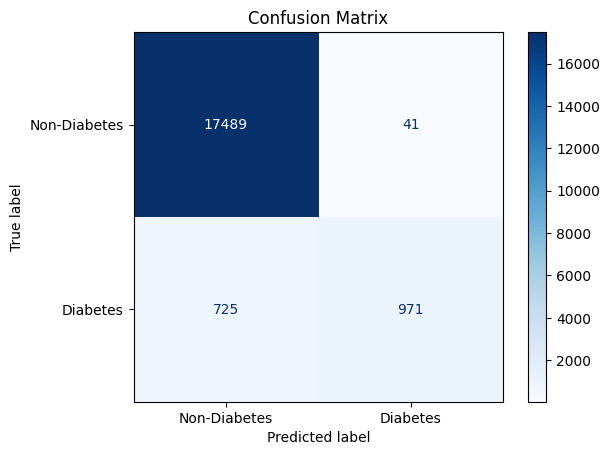

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svm, cmap=plt.cm.Blues)
ax = cmd.ax_
ax.set_title('Confusion Matrix')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

In [95]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(256, 64, 32), max_iter=2000).fit(X_train, y_train)

y_test_pred_mlp = mlp_model.predict(X_test)

classification_report_mlp = classification_report(y_test, y_test_pred_mlp, target_names=labels)
print(classification_report_mlp)

              precision    recall  f1-score   support

Non-Diabetes       0.97      1.00      0.98     17530
    Diabetes       0.98      0.69      0.81      1696

    accuracy                           0.97     19226
   macro avg       0.97      0.84      0.90     19226
weighted avg       0.97      0.97      0.97     19226

